In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Drop the 'customerID' column
df = df.drop('customerID', axis=1)


In [12]:
# Convert 'TotalCharges' to numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### EXPLORATORY DATA ANALYSIS

#### Churn Distribution:

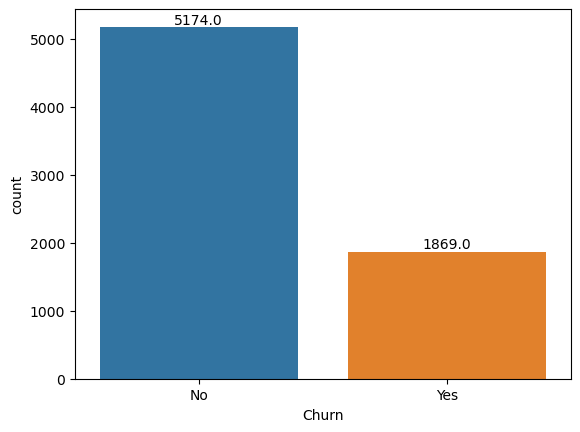

In [18]:
# Plot the distribution of Churn
ax = sns.countplot(x='Churn', data=df)

# Add count values above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', 
            ha='center', va='bottom')

plt.show()

#### Exploring the independent variable's relationship with customer churn

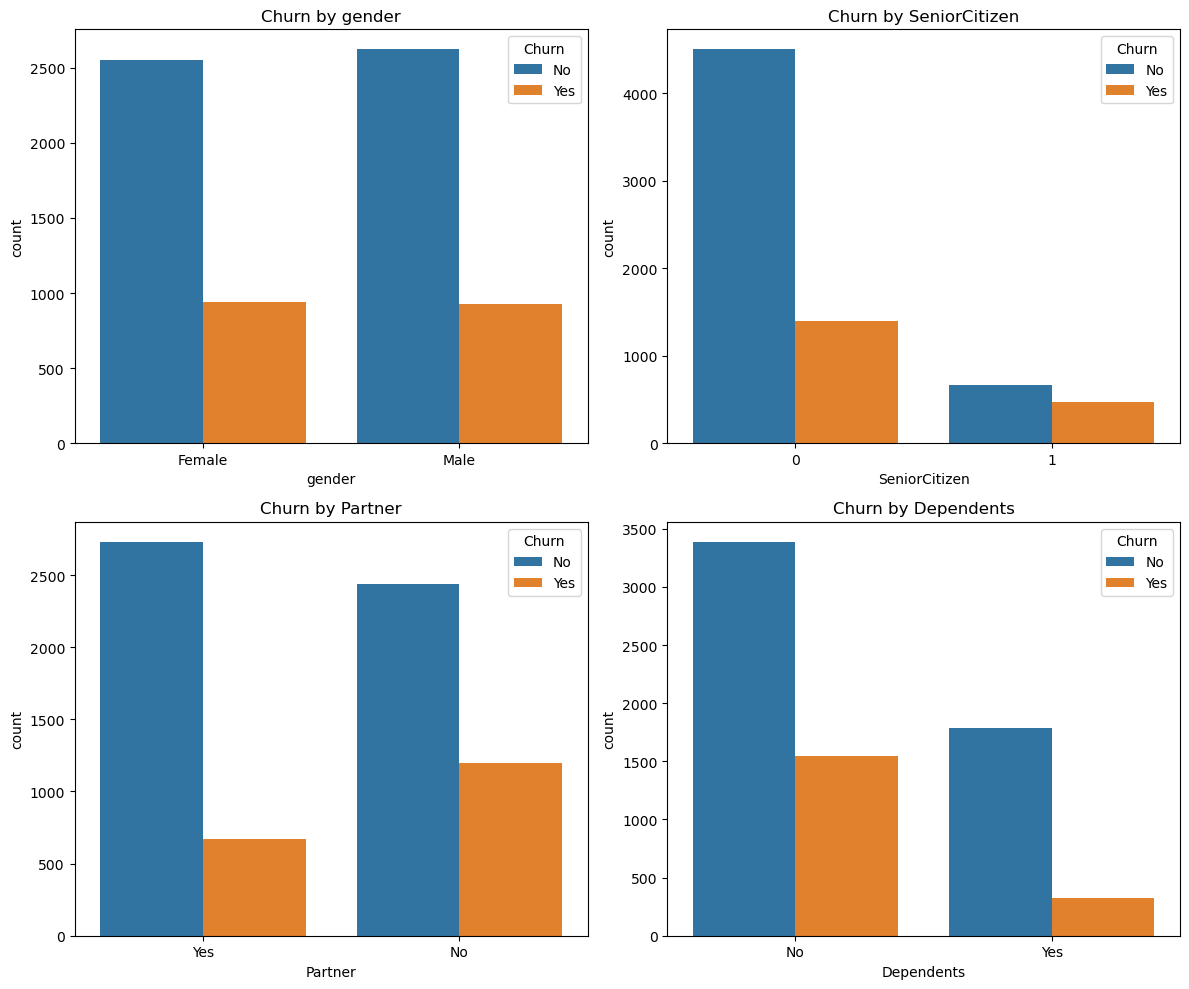

In [40]:

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Specify the columns to analyze
columns_to_analyze = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Loop through columns and create count plots
for col, ax in zip(columns_to_analyze, axes.flatten()):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_title(f'Churn by {col}')

plt.tight_layout()
plt.show()

#### Exploring the Relationship between Charges, Contract Types, and Customer Churn

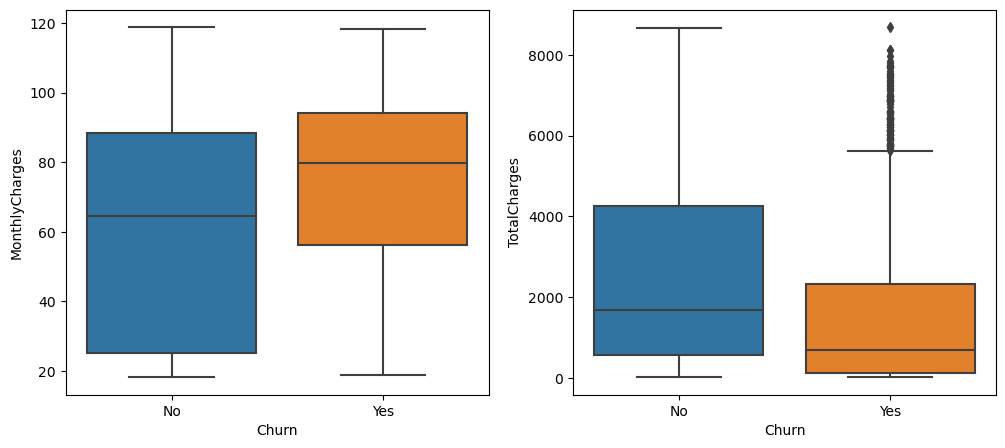

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt



# Boxplot for MonthlyCharges and TotalCharges by Churn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
plt.show()


#### Insights:
observation! The differences in the median values for 'MonthlyCharges' and 'TotalCharges' between customers who churned and those who renewed their subscription provide interesting insights. Let's break down the implications:

For "MonthlyCharges":
Higher Median for Churned Customers:

Customers who churned have a higher median monthly charge.
This suggests that, on average, customers who churned were paying more per month for their subscription compared to customers who renewed.
Potential Implications:

High monthly charges may be a contributing factor to customer churn.
It could indicate that customers are sensitive to increases in monthly costs and are more likely to churn when facing higher charges.
For "TotalCharges":
Lower Median for Churned Customers:

Customers who churned have a lower median total charge.
This suggests that, on average, customers who churned had lower total charges over the entire period compared to customers who renewed.
Potential Implications:

Lower total charges for churned customers may indicate a shorter tenure with the service.
It could suggest that customers who churned may not have stayed with the service for an extended period, resulting in lower cumulative charges.

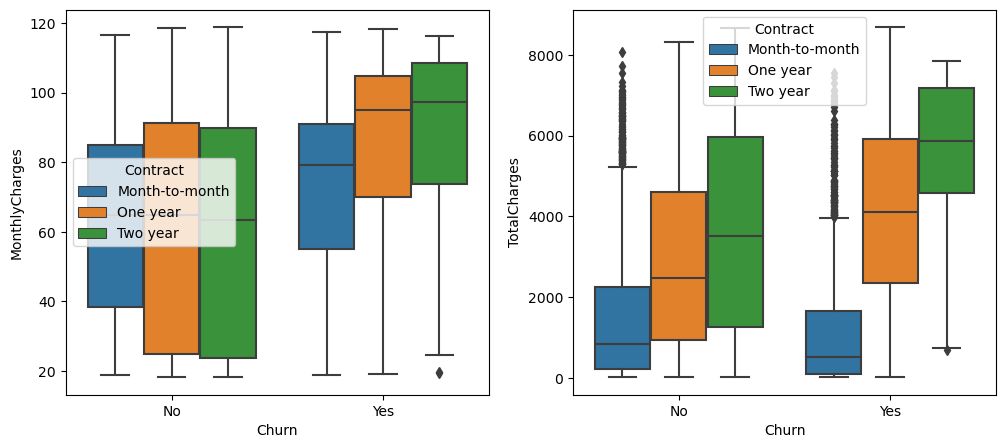

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Boxplot for MonthlyCharges and TotalCharges by Churn and Contract
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Contract', data=df, ax=axes[0])
sns.boxplot(x='Churn', y='TotalCharges', hue='Contract', data=df, ax=axes[1])
plt.show()


#### Insights:

 MonthlyCharges:

For customers who churned (Churn = Yes), the median MonthlyCharges is higher across all categories of Contract (Month-to-Month, One year, Two years).
This suggests that customers who churned generally had higher monthly charges, irrespective of the contract length.


TotalCharges:

For customers who churned (Churn = Yes), the median TotalCharges is higher in the One year and Two years contract categories compared to those who did not churn (Churn = No).
In the Month-to-Month contract category, the median TotalCharges for churned customers is lower than for those who did not churn.
This indicates that, on average, customers who churned had higher total charges in the longer-term contracts, while in the short-term (Month-to-Month), the median total charges were lower for churned customers.

Key Takeaways:

Higher MonthlyCharges seem to be associated with customer churn, regardless of the contract length.
Customers with higher TotalCharges in longer-term contracts are more likely to churn, while in the short-term contract, churned customers had lower median total charges.

#### EDA in relation between MonthlyCharges, TotalCharges & Tenure

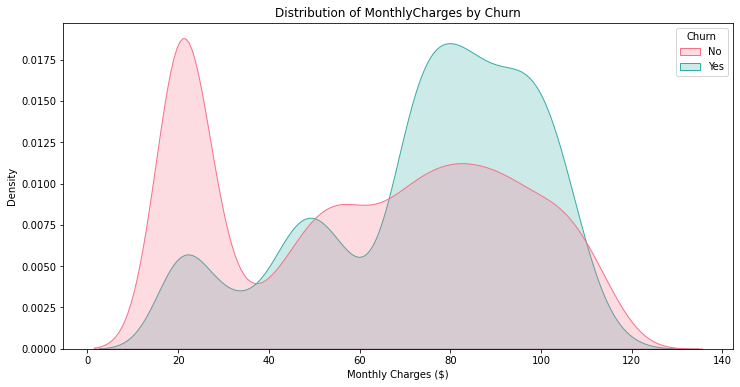

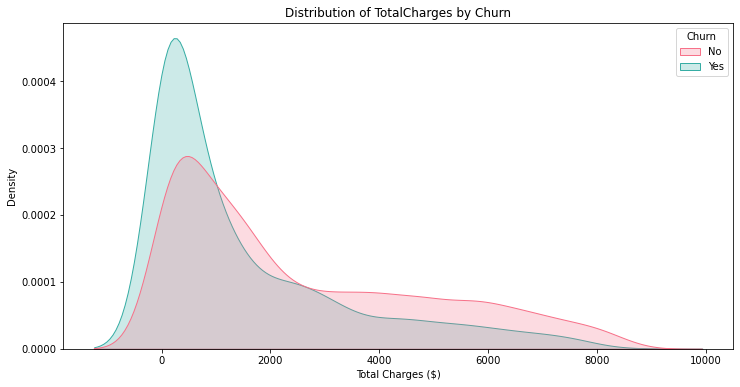

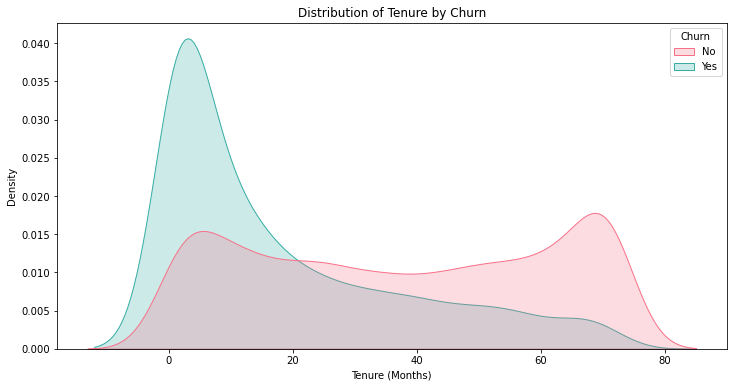

In [51]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Distribution of MonthlyCharges by Churn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Distribution of MonthlyCharges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.show()

# Distribution of TotalCharges by Churn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('Total Charges ($)')
plt.show()

# Distribution of Tenure by Churn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.show()

#### EDA for Exploring the Impact of provided Telco Services on Subscriber Retention

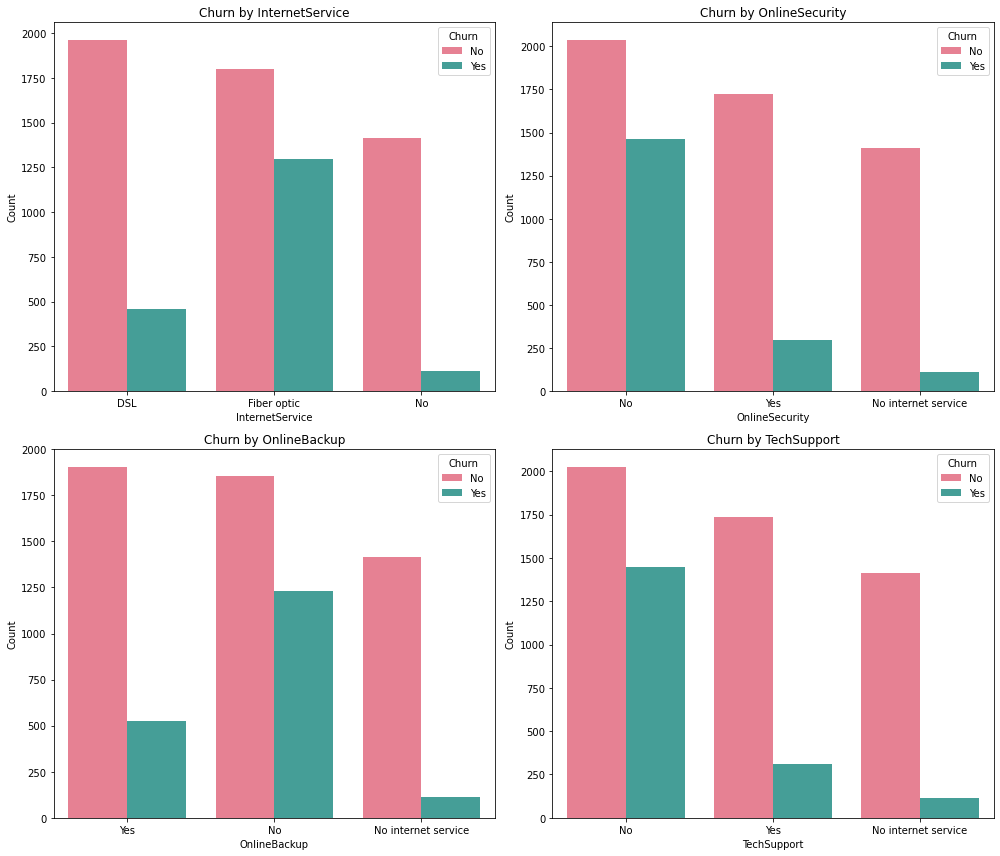

In [190]:
#List of services to visualize
services = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
#Flatten the axes for easier iteration
axes = axes.flatten()
# Iterate through services and make countplots
for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn', data=df, ax=axes[i], palette='husl')
    axes[i].set_title(f'Churn by {service}')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Count')
    
#Adjusting layout
plt.tight_layout()
plt.show()

# Insights:
#### InternetService (Fibre Optic):

Observation: Customers who chose or were using Fiber Optic as their Internet Service have a higher likelihood of churning.
Possible Reasoning: Fiber Optic is known for providing high-speed internet, but it could be more expensive. If the cost is a significant factor and customers find a more affordable option elsewhere, they may choose to churn.
#### OnlineSecurity:

Observation: Customers who don't have online security or didn't sign up for it are more likely to churn.
Possible Reasoning: Online security is crucial for protecting personal information. If customers perceive a lack of security as a risk, they might switch to a service that offers better online security features.
#### OnlineBackup:

Observation: Customers who don't have online backup (i.e., those who answered 'No') are more likely to churn.
Possible Reasoning: Online backup is a valuable feature for safeguarding data. If customers prioritize data protection and the absence of online backup is a perceived drawback, they might seek a service that offers better data backup options.
#### TechSupport:

Observation: Customers who don't have tech support (i.e., those who answered 'No') are more likely to churn.
Possible Reasoning: Tech support is essential for resolving technical issues promptly. Lack of access to reliable tech support may lead to frustration among customers, prompting them to switch to a service that provides better support.
~~~
In summary, the observed trends suggest that the quality and availability of certain services, such as online security, online backup, and tech support, play a significant role in customer satisfaction. Customers are more likely to churn if they perceive a lack of essential services or find better alternatives that meet their specific needs, whether in terms of cost, security, or technical support.
~~~

~~~
If the Telco provides Online Backup, Online Security, and Tech Support as additional services, but customers are not choosing these services in their subscription plans, it could be due to various reasons:
~~~
#### Awareness: 
Customers may not be aware of the additional services offered by the Telco, especially if they are not actively promoted or communicated during the subscription process.

#### Perceived Value: 
Customers might not perceive the added services as valuable or necessary for their needs. They may consider these services optional or not worth the additional cost.

#### Cost Considerations: 
Some customers may be sensitive to the overall cost of their subscription and may choose to opt out of additional services to minimize their monthly charges.

#### External Solutions: 
Customers may already have alternative solutions for online backup, security, or tech support from other providers, making them less inclined to subscribe to these services from the Telco.

#### Technical Competence: 
Some customers may feel confident in handling their online security or tech support needs independently and may not see the need for additional services.

```
To address this, the Telco could consider:
```
#### Improved Communication: 
Ensure that customers are well-informed about the availability and benefits of these additional services during the onboarding process and through regular communication channels.

#### Customization Options: 
Offer flexible subscription plans that allow customers to customize their services based on their preferences and needs.

#### Value Proposition: 
Clearly articulate the value proposition of each service, emphasizing the benefits and advantages customers gain by including them in their subscription.

#### Promotions and Trials: 
Introduce promotions, discounts, or trial periods for these services to encourage customers to try them out and experience their value firsthand.

```
Understanding customer preferences and addressing their needs through effective communication and flexible offerings can contribute to increased adoption of additional services, potentially reducing churn and enhancing overall customer satisfaction.
```









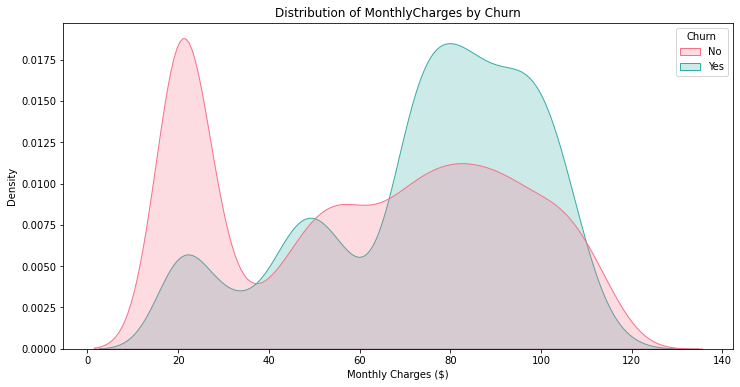

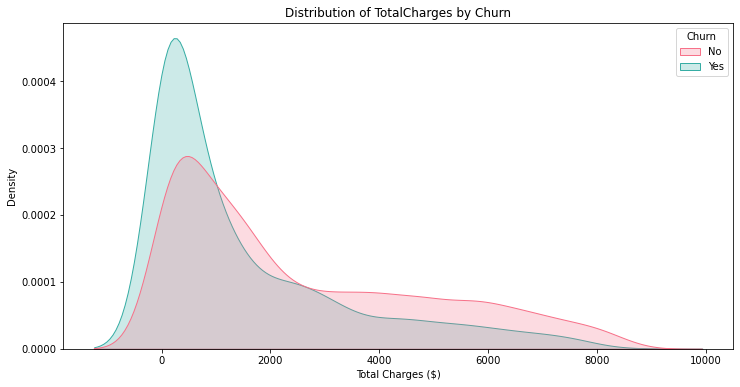

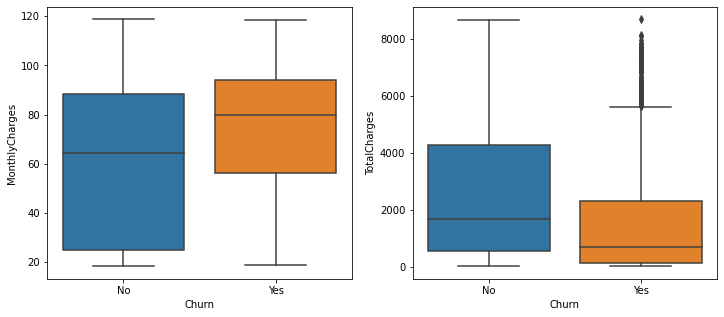

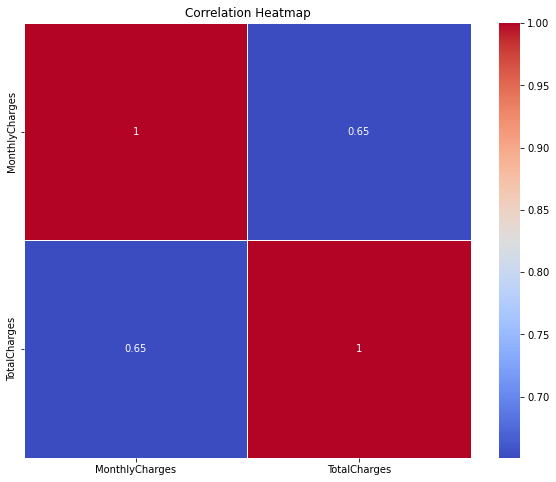

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Distribution of MonthlyCharges by Churn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Distribution of MonthlyCharges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.show()

# Distribution of TotalCharges by Churn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('Total Charges ($)')
plt.show()

# Boxplot for MonthlyCharges and TotalCharges by Churn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### EDA for the relation between payment method chosen by customers influence to churn

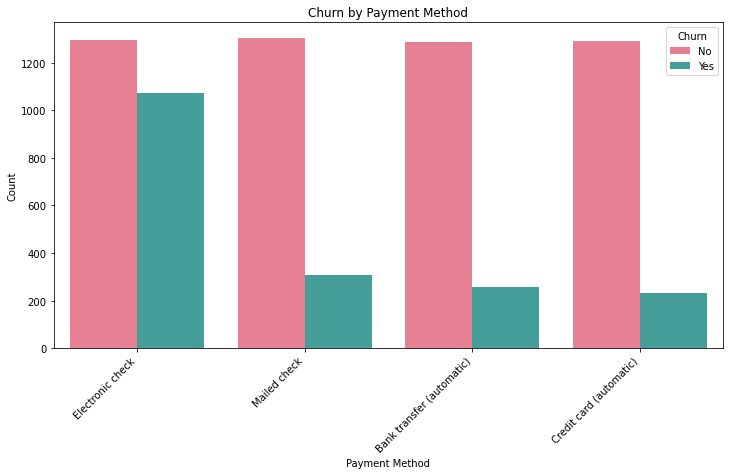

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


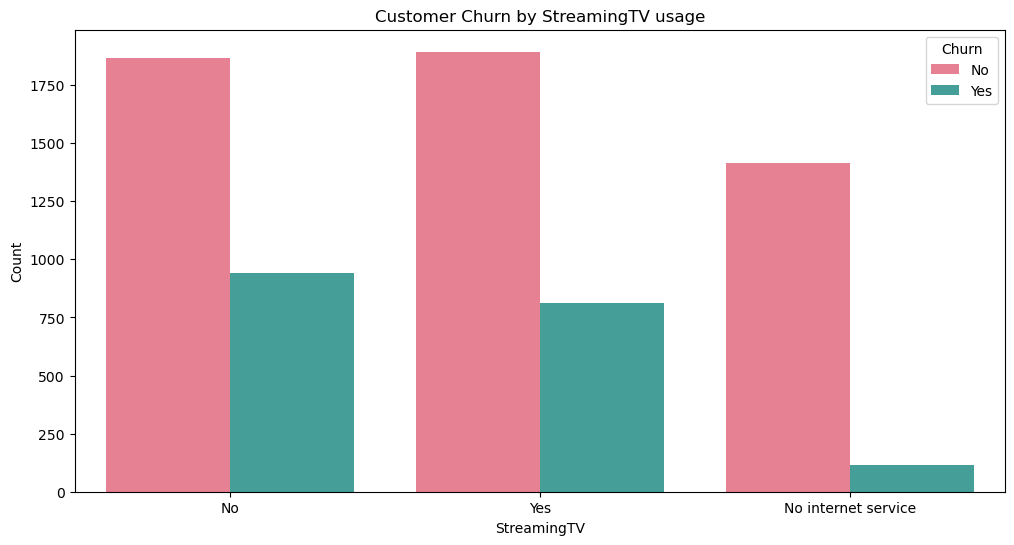

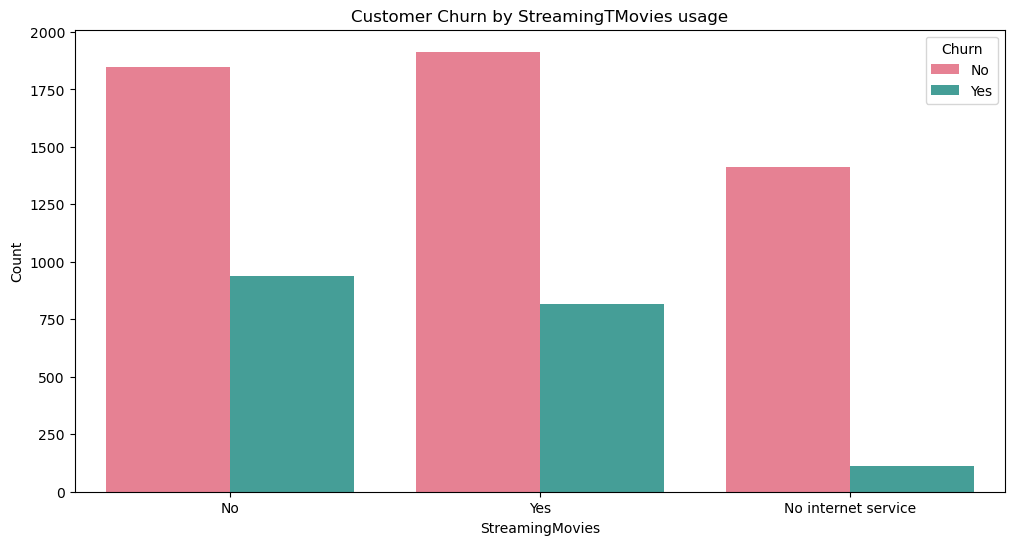

In [12]:
# StreamingTV vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='husl')
plt.title('Customer Churn by StreamingTV usage')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.show()

# StreamingMovies vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='husl')
plt.title('Customer Churn by StreamingTMovies usage')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.show()

### What Investigations/ EDA can be done further?
~~~
Given the analysis you've already conducted on Churn vs. Contract and Churn vs. provided services, there are several other columns you can explore to gain further insights into customer churn:
~~~
#### PaymentMethod:

Investigate whether the payment method chosen by customers influences their likelihood to churn. For example, are customers using electronic checks more prone to churn?
#### PaperlessBilling:

Explore the relationship between paperless billing and churn. Customers who opt for paperless billing might have different behaviors compared to those who prefer traditional billing methods.
#### MonthlyCharges and TotalCharges:

You've already done some analysis on MonthlyCharges and TotalCharges. Consider further investigating these columns to understand the impact of different charge amounts on customer churn.
#### MultipleLines:

Analyze whether customers with multiple lines are more or less likely to churn compared to those with a single line. 

#### Streaming Services (StreamingTV, StreamingMovies):

Explore the relationship between customers who use streaming services and churn. For example, do customers with streaming services have a higher retention rate?
#### Gender, SeniorCitizen, Partner, Dependents:

Revisit demographic factors like gender, senior citizen status, partnership, and dependents to identify any patterns in customer churn based on these characteristics.
Tenure:

~~~
Further analyze tenure to understand if there are specific ranges of tenure where churn is more prevalent.
~~~
#### PhoneService:

Investigate if the presence or absence of phone service has an impact on customer churn.
Remember, the goal is to uncover patterns and relationships that can help explain why customers are churning. Conduct exploratory data analysis (EDA) on these columns to visualize and understand the distribution of values and their correlation with churn.

/tmp/ipykernel_105/3577843267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data[col] = pd.Categorical(correlation_data[col]).codes
/tmp/ipykernel_105/3577843267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data[col] = pd.Categorical(correlation_data[col]).codes
/tmp/ipykernel_105/3577843267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

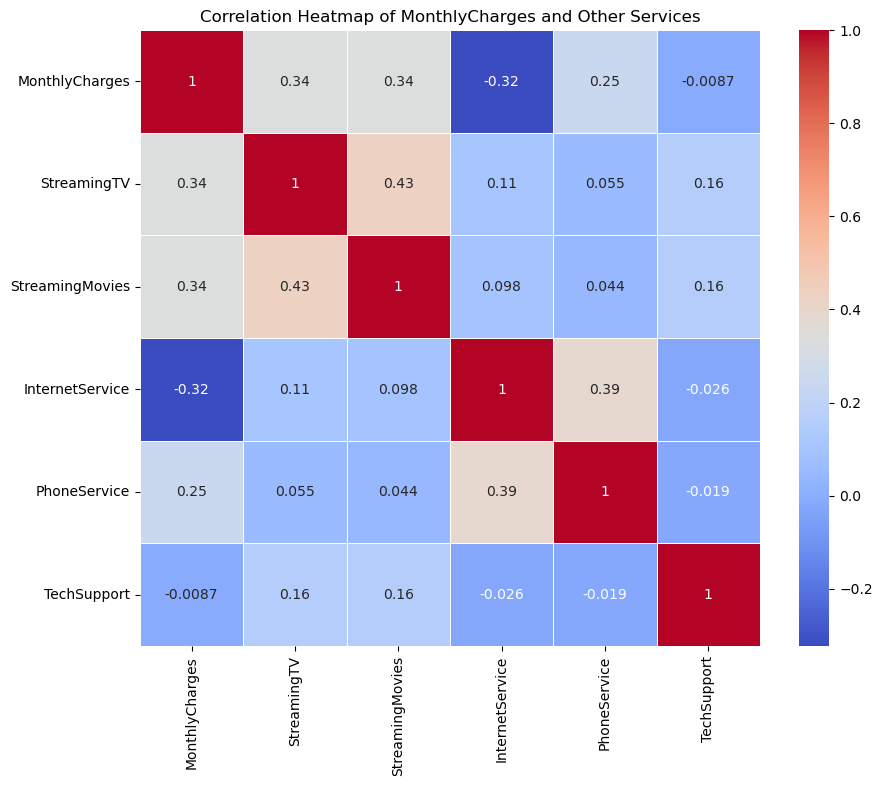

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to visualize relationships between MonthlyCharges and other services
columns_to_correlate = ['MonthlyCharges', 'StreamingTV', 'StreamingMovies', 'InternetService', 'PhoneService', 'TechSupport']
correlation_data = df[columns_to_correlate]

# Convert categorical columns to numerical for correlation heatmap
for col in ['StreamingTV', 'StreamingMovies', 'InternetService', 'PhoneService', 'TechSupport']:
    correlation_data[col] = pd.Categorical(correlation_data[col]).codes

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of MonthlyCharges and Other Services')
plt.show()


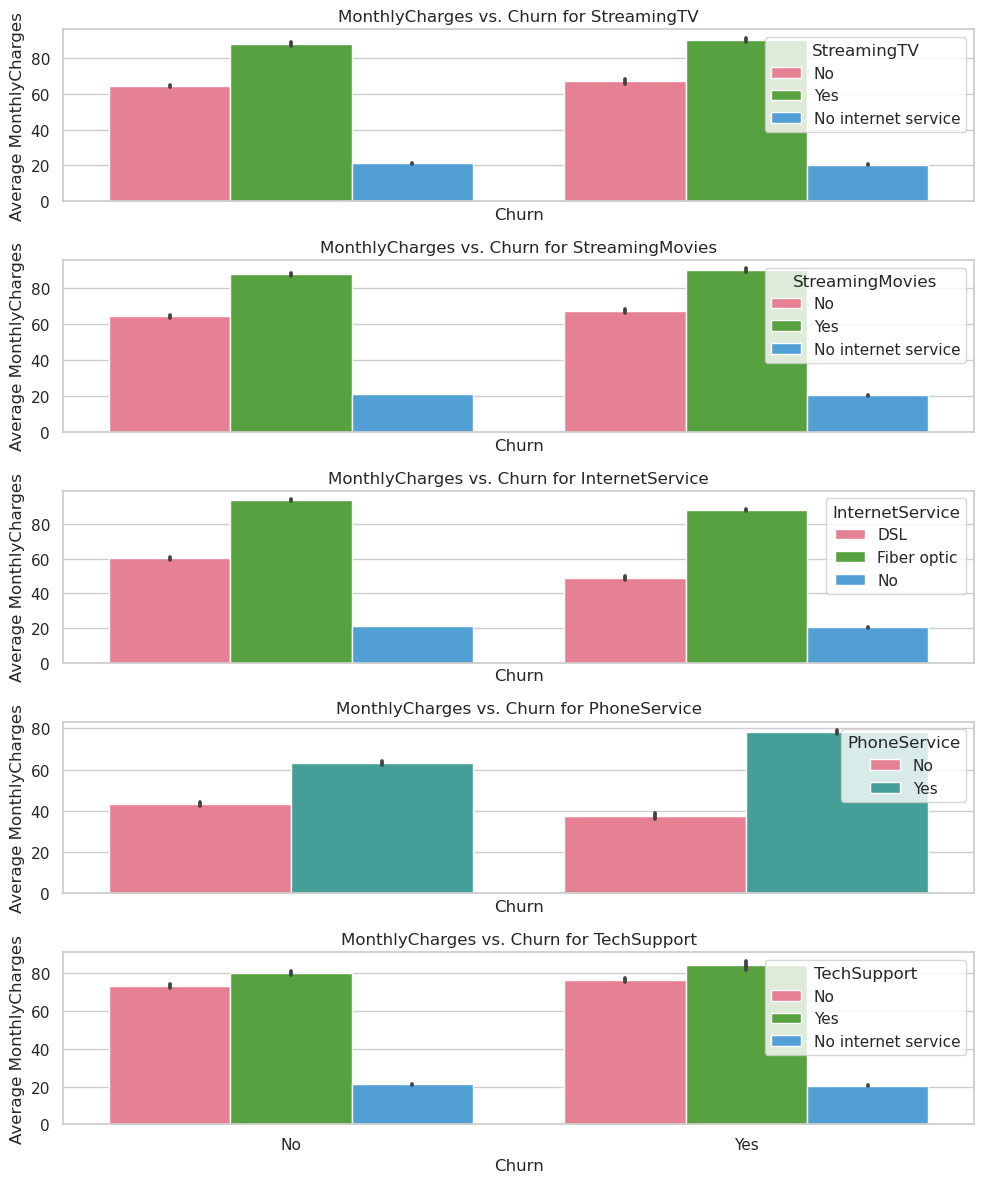

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# List of services to visualize
services_to_compare = ['StreamingTV', 'StreamingMovies', 'InternetService', 'PhoneService', 'TechSupport']

# Create subplots
fig, axes = plt.subplots(nrows=len(services_to_compare), figsize=(10, 12), sharex=True)

# Iterate through services and plot bar plots
for i, service in enumerate(services_to_compare):
    sns.barplot(x='Churn', y='MonthlyCharges', data=df, hue=service, ax=axes[i], palette='husl')
    axes[i].set_title(f'MonthlyCharges vs. Churn for {service}')
    axes[i].set_ylabel('Average MonthlyCharges')
    axes[i].legend(title=service, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


#### Feature Encoding (converting categorical data into numeric format)

In [20]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Create new features as an input in DF from the EDA insights 

1. Churn_Fee_High_MonthlyCharges: Indicates whether the MonthlyCharges are in the higher range associated with churn.
2. Churn_Fee_EarlyChurn_TotalCharges: Reflects early churn based on the TotalCharges being in the lower range.
3. Churn_EarlyTenure: Captures the possibility of churn in early tenure and with Fiber optic Internet service.
4. HighPossibility_Internet: Captures the possibility of churn In Internet where Fiber optic has chosen.
5. Churn_Possibility_ElectronicCheck_Payment: Indicates the likelihood of churn based on the choice of Electronic check as the payment method.


In [23]:
# Feature Engineering
df['Churn_Fee_High_MonthlyCharges'] = (df['MonthlyCharges'] > 60) & (df['MonthlyCharges'] < 100)
df['Churn_Fee_EarlyChurn_TotalCharges'] = (df['TotalCharges'] >= 0) & (df['TotalCharges'] <= 1000)
df['Churn_EarlyTenure'] = (df['tenure'] >= 0) & (df['tenure'] <= 20)
df['HighPossibility_Internet'] = (df['InternetService'] == 'Fiber optic').astype(int)
df['Churn_Possibility_ElectronicCheck_Payment'] = (df['PaymentMethod'] == 'Electronic check').astype(int)

# Selective Label Encoding for Necessary Categorical Columns
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the resulting DataFrame
print(df.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0                 1              2           29.85         29.85 

In [25]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Fee_High_MonthlyCharges,Churn_Fee_EarlyChurn_TotalCharges,Churn_EarlyTenure,HighPossibility_Internet,Churn_Possibility_ElectronicCheck_Payment
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,No,False,True,True,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,No,False,False,False,0,0
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,Yes,False,True,True,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,No,False,False,False,0,0
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,Yes,True,True,True,1,1
5,0,0,0,0,8,1,2,1,0,0,...,1,2,99.65,820.50,Yes,True,True,True,1,1
6,1,0,0,1,22,1,2,1,0,2,...,1,1,89.10,1949.40,No,True,False,False,1,0
7,0,0,0,0,10,0,1,0,2,0,...,0,3,29.75,301.90,No,False,True,True,0,0
8,0,0,1,0,28,1,2,1,0,0,...,1,2,104.80,3046.05,Yes,False,False,False,1,1
9,1,0,0,1,62,1,0,0,2,2,...,0,0,56.15,3487.95,No,False,False,False,0,0


In [27]:
df.to_csv(r"G:\Aishin's MEng notes\DataAnalysisProjects\CustomerChurn\Telco_df.csv", index=False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     7043 non-null   int64  
 1   SeniorCitizen                              7043 non-null   int64  
 2   Partner                                    7043 non-null   int64  
 3   Dependents                                 7043 non-null   int64  
 4   tenure                                     7043 non-null   int64  
 5   PhoneService                               7043 non-null   int64  
 6   MultipleLines                              7043 non-null   int64  
 7   InternetService                            7043 non-null   int64  
 8   OnlineSecurity                             7043 non-null   int64  
 9   OnlineBackup                               7043 non-null   int64  
 10  DeviceProtection        

In [31]:
# Replace missing values with the mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [33]:
# Check for NaN values in the entire DataFrame
nan_summary = df.isna().sum()

# Display the summary of NaN values
print(nan_summary)


gender                                       0
SeniorCitizen                                0
Partner                                      0
Dependents                                   0
tenure                                       0
PhoneService                                 0
MultipleLines                                0
InternetService                              0
OnlineSecurity                               0
OnlineBackup                                 0
DeviceProtection                             0
TechSupport                                  0
StreamingTV                                  0
StreamingMovies                              0
Contract                                     0
PaperlessBilling                             0
PaymentMethod                                0
MonthlyCharges                               0
TotalCharges                                 0
Churn                                        0
Churn_Fee_High_MonthlyCharges                0
Churn_Fee_Ear

### CUSTOMER CHURN PREDICTIVE MODEL 

### LOGISTIC REGRESSION CLASSIFIER

In [35]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversampling only the training set using SMOTE
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Scaling features (optional, depending on the algorithm used)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Building the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


Accuracy: 0.7643

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.79      0.83      1539
         Yes       0.55      0.70      0.62       574

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Confusion Matrix:
 [[1211  328]
 [ 170  404]]


In [37]:
# Check the balance of classes in the resampled training set
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_balance = dict(zip(unique, counts))

print('Class balance after oversampling:')
print(class_balance)


Class balance after oversampling:
{'No': 3635, 'Yes': 3635}


### RANDOM FOREST CLASSIFIER

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Building the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the results for Random Forest
print('Random Forest Results:')
print(f'Accuracy: {accuracy_rf:.4f}\n')
print('Classification Report:\n', classification_rep_rf)
print('Confusion Matrix:\n', conf_matrix_rf)

# Using the Logistic Regression model (as done previously)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results for Logistic Regression
print('\nLogistic Regression Results:')
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Random Forest Results:
Accuracy: 0.7714

Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.84      0.84      1539
         Yes       0.58      0.57      0.58       574

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.77      0.77      0.77      2113

Confusion Matrix:
 [[1300  239]
 [ 244  330]]

Logistic Regression Results:
Accuracy: 0.7643

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.79      0.83      1539
         Yes       0.55      0.70      0.62       574

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Confusion Matrix:
 [[1211  328]
 [ 170  404]]


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

# Splitting the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert 'Churn' to binary labels
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversampling only the training set using SMOTE
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# ... (rest of your code remains unchanged)

# List of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier()
}

# Loop through classifiers
for name, model in classifiers.items():
    print(f"Training {name} model...")
    # For Neural Network, flatten input data
    if name == 'Neural Network':
        X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], -1))
        X_test_flat = X_test.reshape((X_test.shape[0], -1))
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_flat)
    else:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"\nResults for {name} model:")
    print(f'Accuracy: {accuracy:.4f}\n')
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    print("="*50)


Training Random Forest model...

Results for Random Forest model:
Accuracy: 0.7761

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1539
           1       0.59      0.59      0.59       574

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113

Confusion Matrix:
 [[1302  237]
 [ 236  338]]
Training SVM model...

Results for SVM model:
Accuracy: 0.6805

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76      1539
           1       0.44      0.59      0.50       574

    accuracy                           0.68      2113
   macro avg       0.63      0.65      0.63      2113
weighted avg       0.72      0.68      0.69      2113

Confusion Matrix:
 [[1098  441]
 [ 234  340]]
Training K-Nearest Neighbors model...

Results for K-Neare

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [45]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.
